In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from modeling_prediction.model import plot_results

In [2]:
# main.py

from set_up.interface import interface
from preprocessing.data_loading import dataLoading
from preprocessing.preprocessong_controler import preprocessong_controler as preprocessing
from modeling_permutation.imputation_controler import imput_controler as imputation
from modeling_prediction.prediction_controler import prediction_controler as prediction
from results.data_export import export_controler as export
from results.visualization import visualization_conroler as visualization


from set_up.constants import ADRS_IMPORT, \
    MIN_DATE, MAX_DATE, N_MONTHS, \
        ADMIN_LOCATIONS, PRODUCTS_LABELS, \
            PREDICT_ADMIN, PREDICT_CITIES, PREDICT_PRODUCTS, \
                ADRS_IMPUTED 

from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')


In [3]:

# set up a log system
import logging
logging.basicConfig(
    format="{asctime} - {filename} - {message}",
    style="{", 
    datefmt="%Y-%m-%d %H:%M:%S",
    level=logging.INFO  # Set logging level to INFO
)
log = logging.getLogger(__name__) # instantiate a Logger




In [5]:
# lead data
log.info("Started the program")

log.info("Runs interface stage")
choice = interface()
if choice == 0:
    print("program closed without processing.")
    log.info("program closed without processing.")
    exit()

log.info("Runs data loading stage")
unprocessed_data = dataLoading(ADRS_IMPORT)



2024-11-27 11:56:44 - 2792708270.py - Started the program
2024-11-27 11:56:44 - 2792708270.py - Runs interface stage


~~~~~~~~~~~~~~~~~~~~~~~

Hello!
This is a program which can impute and predict information
based on pre-existing data.
~~~~~~~~~~~~~~~~~~~~~~~

press 1 for imputation without prediction.
press 2 for imputation with predicition.
press 3 for predicition without imputation.
press 0 to exit
your choice is  2
~~~~~~~~~~~~~~~~~~~~~~~

Provided the original data spans  2016-05  to  2024-04
Your current chosen min month to assess is:  2016-05
Your current chosen max month to assess is:  2024-09

data will be processed from  2016-05  to  2024-09

If you wish to change these months please edit set_up/constant.py


 ~~~~~~~~~~~~~~~~~~~~~~~

The following are the parameters
which will be used when running the program.
to edit them change them in impact/set_up/constants.py
The parameters currently assessed are: 

choice =  2 . Program will perform imputation with predicition
data will be taken from:  ./../data/raw/dataframe_data.csv
raw data is recorded from  2016-05  to  2024-04
data will be proce

2024-11-27 11:56:47 - 2792708270.py - Runs data loading stage
2024-11-27 11:56:47 - data_loading.py - Started loading data from file
2024-11-27 11:56:48 - data_loading.py - data has been loaded
2024-11-27 11:56:48 - data_loading.py - started converting raw data format to panda dataframe


In [6]:
log.info("Runs preprocessing stage")
outlierless_data, admin_raw_data = preprocessing(unprocessed_data,
                                                    admin_locations=ADMIN_LOCATIONS,
                                                    min_date=MIN_DATE, max_date=MAX_DATE,
                                                    choice=choice)

2024-11-27 11:56:56 - 287410653.py - Runs preprocessing stage
2024-11-27 11:56:56 - preprocessong_controler.py - Started preprocessing controler
2024-11-27 11:56:56 - preprocessong_controler.py - Starting filtering
2024-11-27 11:56:56 - preprocessong_controler.py - Starting to correct empty cells for NAN.
2024-11-27 11:56:56 - preprocessong_controler.py - Starting to remove empty rows
2024-11-27 11:56:56 - preprocessong_controler.py - Starting to convert months from words to int.
2024-11-27 11:56:56 - preprocessong_controler.py - start concatonating year_month columns
2024-11-27 11:56:56 - preprocessong_controler.py - removing outliers
2024-11-27 11:57:16 - remove_outliers.py - Outliers have been detected: 962


In [8]:
# admin_raw_data["admin2_label"]

In [9]:
# run imputation ... may take a while 
log.info("Runs Imputation stage")
imputed_data = {}
if choice in {1, 2}:
    data_wihtout_meb, imputed_data = imputation(outlierless_data, admin_raw_data)
elif choice == 3:
    imputed_data[PREDICT_ADMIN] = dataLoading(ADRS_IMPUTED[PREDICT_ADMIN])
else:
    raise ValueError("no imputated data was loaded")

2024-11-27 11:57:25 - 1404853776.py - Runs Imputation stage
2024-11-27 11:57:25 - imputation_controler.py - perform admin 0 imputation
2024-11-27 11:57:25 - imputation_controler.py - Start Imputation for the averaged data
2024-11-27 11:57:25 - imputation_controler.py - perform admin 1 imputation
2024-11-27 11:57:25 - imputation_controler.py - Start Imputation for admin1_label data (may take more than 20 min)
2024-11-27 11:57:27 - admin1_dataset_creater.py - np.nanmean(nearest_locations_values) triggers a "RuntimeWarning: Mean of empty slice" that as been supressed


 ARIMA(3,2,2)(0,0,0)[0] intercept
 ARIMA(2,2,1)(0,0,0)[0] intercept
 ARIMA(0,2,4)(0,0,0)[0] intercept
 ARIMA(0,1,4)(0,0,0)[0] intercept
 ARIMA(2,2,3)(0,0,0)[0] intercept
 ARIMA(0,1,5)(0,0,0)[0] intercept
 ARIMA(4,2,1)(0,0,0)[0] intercept
 ARIMA(3,2,1)(0,0,0)[0] intercept
 ARIMA(0,1,3)(0,0,0)[0] intercept
 ARIMA(2,1,2)(0,0,0)[0] intercept
 ARIMA(0,2,4)(0,0,0)[0] intercept
 ARIMA(4,1,1)(0,0,0)[0] intercept
 ARIMA(1,2,2)(0,0,0)[0] intercept
 ARIMA(0,1,1)(0,0,0)[0] intercept
 ARIMA(5,2,0)(0,0,0)[0] intercept
 ARIMA(0,2,4)(0,0,0)[0] intercept
 ARIMA(2,1,2)(0,0,0)[0] intercept
 ARIMA(0,1,1)(0,0,0)[0] intercept
 ARIMA(2,2,3)(0,0,0)[0] intercept
 ARIMA(0,2,5)(0,0,0)[0] intercept
 ARIMA(3,2,1)(0,0,0)[0] intercept
 ARIMA(2,2,1)(0,0,0)[0] intercept
 ARIMA(3,1,2)(0,0,0)[0] intercept
 ARIMA(0,2,4)(0,0,0)[0] intercept
 ARIMA(0,1,1)(0,0,0)[0] intercept
 ARIMA(1,2,3)(0,0,0)[0] intercept
 ARIMA(2,2,1)(0,0,0)[0] intercept
 ARIMA(0,1,1)(0,0,0)[0] intercept
 ARIMA(3,1,0)(0,0,0)[0] intercept
 ARIMA(0,2,4)(

KeyboardInterrupt: 

In [ ]:
# imputed_data["admin1_label"]

sugar_price    0
dtype: int64
sugar_price    3
dtype: int64


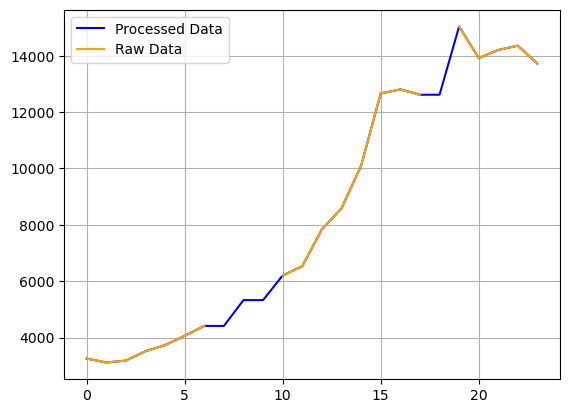

In [ ]:
# Analyze a single time series: first, plot the fully processed time series, then plot the NaN values in the series.
# Additionally, calculate the total number of NaN values in that particular time series.

# Select the time series column and specific admin level
pp = "sugar_price"  # Column name for the time series (egg price)
adm = 'Aleppo' # The specific admin level (Ras Al Ain)
admin_lev = "admin1_label"  # Admin level column name

# Analyzing the first data source (processed data)
sinlge_admin_level_df = imputed_data[admin_lev][data_wihtout_meb[admin_lev][admin_lev] == adm]
single_good_admin = sinlge_admin_level_df[pp]  # Extracting the time series (egg price)
single_good_admin = single_good_admin.reset_index().drop(columns=["index"])  # Reset index and drop unnecessary column

# Print the number of NaN values in the time series
print(single_good_admin.isna().sum())

# Plot the fully processed time series
plt.plot(single_good_admin, label="Processed Data", color="blue")  # Plot the time series in blue

# # # Analyzing the second data source (raw data)
sinlge_admin_level_df = admin_raw_data[admin_lev][admin_raw_data[admin_lev][admin_lev] == adm]
single_good_admin = sinlge_admin_level_df[pp]  # Extracting the time series (egg price)
single_good_admin = single_good_admin.reset_index().drop(columns=["index"])  # Reset index and drop unnecessary column

# Print the number of NaN values in the time series
print(single_good_admin.isna().sum())

# Plot the raw data time series
plt.plot(single_good_admin, label="Raw Data", color="orange")  # Plot the time series in orange

# Add a legend to the plot to differentiate between the processed and raw data
plt.legend()

# Add grid lines to the plot for better readability
plt.grid(True)

# Show the plot
# plt.show()


In [ ]:

#perform forecasting

predicted_data = defaultdict(lambda: None) #m makes it so any other key return None
if choice in {2, 3}:
    log.info("Run prediction stage")
    predicted_data[PREDICT_ADMIN] = prediction(imputed_data[PREDICT_ADMIN], PREDICT_ADMIN,\
                                                        PREDICT_CITIES, PREDICT_PRODUCTS, N_MONTHS)



2024-11-27 11:44:18 - 908765753.py - Run prediction stage
2024-11-27 11:44:18 - prediction_controler.py - Predicting the prices of the products in the cities for the next 4
2024-11-27 11:44:18 - model.py - Processing bulgur_price for Aleppo...
2024-11-27 11:44:32 - model.py - Model is fit
2024-11-27 11:44:32 - model.py - Forecast for step 1: 9.289710347900401
2024-11-27 11:44:32 - model.py - Forecast for step 2: 9.3026087324077
2024-11-27 11:44:33 - model.py - Forecast for step 3: 9.314823013620874
2024-11-27 11:44:33 - model.py - Forecast for step 4: 9.326386676840864


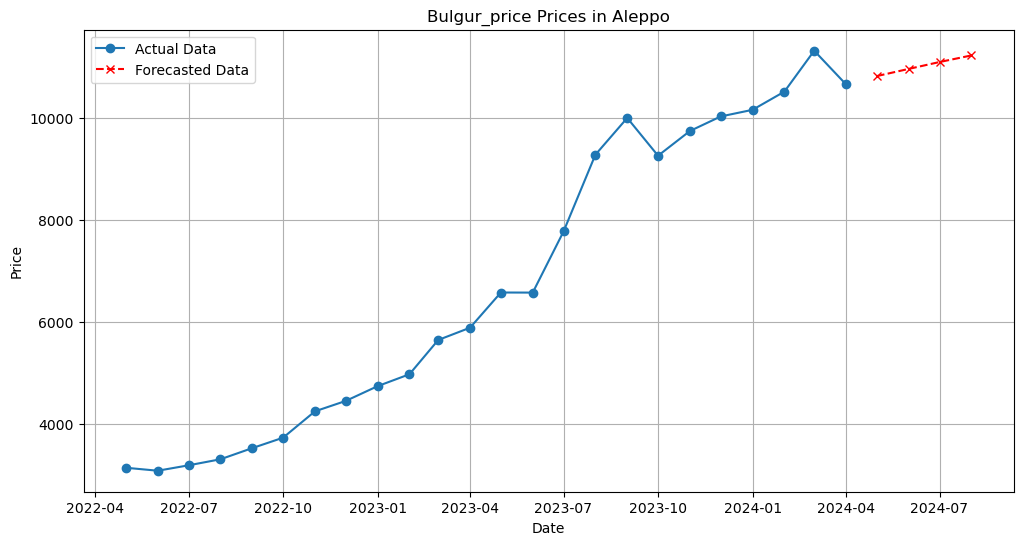

In [ ]:
# generate a forecasting plot (just for testing here)
plot_results(predicted_data[PREDICT_ADMIN], imputed_data[PREDICT_ADMIN], PREDICT_ADMIN, PREDICT_CITIES, PREDICT_PRODUCTS)


In [ ]:

log.info("Runs Export stage")
time_folder = export(choice, imputed_data, predicted_data)

# log.info("Runs visualization stage")
# visualization(choice, admin_raw_data, imputed_data, predicted_data)

# log.info("Program completed")

2024-11-27 11:55:50 - 114174147.py - Runs Export stage
2024-11-27 11:55:50 - data_export.py - start exporting imputed data.
